# BLG-307 Yapay Zeka Sistemleri — 2. Proje (2025-26 Güz)

**Konu:** Karınca Kolonisi Algoritması ile Yol Optimizasyonu 

**Senaryo 4:** Antalya / Muratpaşa ilçesinde kargo firmasının 20 mağazaya uğrayıp en kısa turu bulması.

**SUDE NİHAL YALÇIN 2212721054**
> **GitHub Repo Bağlantısı:** https://github.com/[kullanici_adi]/aco_yol_optimizasyonu

---



### Kullanılan Teknolojiler:
- **Nominatim (OpenStreetMap)**: Adres → Koordinat dönüşümü 
- **OSRM (Open Source Routing Machine)**: Gerçek sürüş mesafeleri 
- **Karınca Kolonisi Algoritması**: TSP optimizasyonu
- **Streamlit**: Web arayüzü 
- **Folium + OpenStreetMap**: Harita görselleştirme 




In [1]:
import sys
import os

sys.path.append(os.path.abspath(".."))

In [2]:
from src.aco import ACOParams, solve_tsp_aco
from src.maps import geocode_locations, distance_matrix_meters

## 1) Lokasyonların Belirlenmesi

Muratpaşa ilçesindeki 20 farklı mağaza lokasyonu `data/locations.json` dosyasında tanımlanmıştır. Bu lokasyonlar gerçek adreslerdir ve Nominatim  ile koordinatları alınacaktır.

In [3]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

with open('../data/locations.json','r',encoding='utf-8') as f:
    locations = json.load(f)

df = pd.DataFrame(locations)
print(f"Toplam lokasyon sayısı: {len(locations)}")
print("\nLokasyonlar:")
df.head(10)

Toplam lokasyon sayısı: 20

Lokasyonlar:


,name,address
0,Kargo Firması Merkezi,"Çağlayan Mahallesi, Barış Manço Bulvarı No:15,..."
1,TerraCity AVM,"Fener Mahallesi, Tekelioğlu Caddesi No:55, Mur..."
2,MarkAntalya AVM,"Tahılpazarı Mahallesi, Kazım Özalp Caddesi No:..."
3,Teknosa Güllük Mağazası,"Güllük Mahallesi, Güllük Caddesi No:73, Muratp..."
4,Vatan Computer Lara,"Çağlayan Mahallesi, Lara Caddesi No:142, Murat..."
5,MediaMarkt MarkAntalya,"Tahılpazarı Mahallesi, Şarampol Caddesi No:84,..."
6,Migros Jet Varlık,"Varlık Mahallesi, 186. Sokak No:44B, Muratpaşa..."
7,Migros Fener Şubesi,"Fener Mahallesi, Fener Caddesi No:28, Muratpaş..."
8,Carrefour Lara,"Şirinyalı Mahallesi, Lara Caddesi No:230, Mura..."
9,LC Waikiki Şarampol,"Tahılpazarı Mahallesi, Şarampol Caddesi No:67,..."


In [ ]:
print("📍 Koordinatlar alınıyor (Nominatim)...")
coords = geocode_locations(locations)

print("🗺️ Mesafe matrisi hesaplanıyor (OSRM )...")
dist = distance_matrix_meters(coords)

print(f"✅ İşlem tamamlandı!")
print(f"İlk koordinat: {coords[0]}")
print(f"Mesafe matrisi boyutu: {dist.shape}")
print(f"Ortalama mesafe: {np.mean(dist[dist > 0])/1000:.2f} km")

📍 Koordinatlar alınıyor (Nominatim)...
  Trying: Çağlayan Mahallesi, Barış Manço Bulvarı No:15, Muratpaşa/Antalya, Turkey
  Trying: Çağlayan Mahallesi, Barış Manço Bulvarı No:15, Muratpaşa/Antalya, Antalya, Turkey
  Trying: Çağlayan Mahallesi, Barış Manço Bulvarı No:15, Muratpaşa/Antalya
  Trying: Çağlayan Mahallesi, Antalya, Turkey
  ✅ Success with: Çağlayan Mahallesi, Antalya, Turkey
  📍 Kargo Firması Merkezi: 36.851031, 30.767318
  Trying: Fener Mahallesi, Tekelioğlu Caddesi No:55, Muratpaşa/Antalya, Turkey
  Trying: Fener Mahallesi, Tekelioğlu Caddesi No:55, Muratpaşa/Antalya, Antalya, Turkey
  Trying: Fener Mahallesi, Tekelioğlu Caddesi No:55, Muratpaşa/Antalya
  Trying: Fener Mahallesi, Antalya, Turkey
  ✅ Success with: Fener Mahallesi, Antalya, Turkey
  📍 TerraCity AVM: 36.853423, 30.755730
  Trying: Tahılpazarı Mahallesi, Kazım Özalp Caddesi No:84, Muratpaşa/Antalya, Turkey
  Trying: Tahılpazarı Mahallesi, Kazım Özalp Caddesi No:84, Muratpaşa/Antalya, Antalya, Turkey
  Trying: 

## 3) Karınca Kolonisi Algoritması (ACO) ile En Kısa Tur

ACO algoritması parametreleri:
- **α (alpha)**: Feromon etkisi (1.0)
- **β (beta)**: Heuristik bilgi etkisi (3.0) 
- **ρ (rho)**: Buharlaşma oranı (0.35)
- **Q**: Feromon miktarı sabiti (100.0)
- **Karınca sayısı**: 40
- **İterasyon sayısı**: 150

In [5]:
# ACO parametrelerini ayarla
params = ACOParams(
    ants=40,           # Karınca sayısı
    iterations=150,    # İterasyon sayısı
    alpha=1.0,         # Feromon etkisi
    beta=3.0,          # Heuristik bilgi etkisi
    rho=0.35,          # Buharlaşma oranı
    q=100.0,           # Feromon miktarı sabiti
    seed=42            # Rastgelelik tohumu
)

print("🐜 ACO algoritması çalışıyor...")
best_route, best_len_m, history = solve_tsp_aco(dist, params, start=0)

print(f"✅ En iyi rota bulundu!")
print(f"📏 Toplam mesafe: {best_len_m/1000:.2f} km")
print(f"🛣️ Rota sırası: {best_route}")

🐜 ACO algoritması çalışıyor...
✅ En iyi rota bulundu!
📏 Toplam mesafe: 22.02 km
🛣️ Rota sırası: [0, 18, 10, 4, 7, 15, 1, 8, 12, 13, 3, 19, 11, 6, 2, 14, 5, 16, 9, 17]


## 4) Sonuçların Görselleştirilmesi

In [6]:
# Rota tablosu
ordered = [locations[i]["name"] for i in best_route] + [locations[best_route[0]]["name"]]
route_df = pd.DataFrame({
    "Sıra": list(range(1, len(ordered)+1)), 
    "Durak": ordered,
    "Durum": ["🏢 Başlangıç"] + ["📦 Teslimat"]*(len(ordered)-2) + ["🔄 Dönüş"]
})

print("🛣️ Optimum Rota Sırası:")
print(route_df.to_string(index=False))

# İstatistikler
print(f"\n📊 İstatistikler:")
print(f"Toplam Mesafe: {best_len_m/1000:.2f} km")
print(f"Ortalama Durak Arası: {best_len_m/len(locations)/1000:.2f} km")
print(f"Toplam Durak Sayısı: {len(locations)}")

🛣️ Optimum Rota Sırası:
 Sıra                   Durak       Durum
    1   Kargo Firması Merkezi 🏢 Başlangıç
    2        Karaca Home Lara  📦 Teslimat
    3     Watsons Lara Şubesi  📦 Teslimat
    4     Vatan Computer Lara  📦 Teslimat
    5     Migros Fener Şubesi  📦 Teslimat
    6          Mavi TerraCity  📦 Teslimat
    7           TerraCity AVM  📦 Teslimat
    8          Carrefour Lara  📦 Teslimat
    9   BİM Yeşilbahçe Şubesi  📦 Teslimat
   10   ŞOK Market Zerdalilik  📦 Teslimat
   11 Teknosa Güllük Mağazası  📦 Teslimat
   12           Eczane Sağlık  📦 Teslimat
   13           Gratis Güllük  📦 Teslimat
   14       Migros Jet Varlık  📦 Teslimat
   15         MarkAntalya AVM  📦 Teslimat
   16        A101 Tahılpazarı  📦 Teslimat
   17  MediaMarkt MarkAntalya  📦 Teslimat
   18       Koton MarkAntalya  📦 Teslimat
   19     LC Waikiki Şarampol  📦 Teslimat
   20        DeFacto Şarampol  📦 Teslimat
   21   Kargo Firması Merkezi     🔄 Dönüş

📊 İstatistikler:
Toplam Mesafe: 22.02 km
Ortalama D

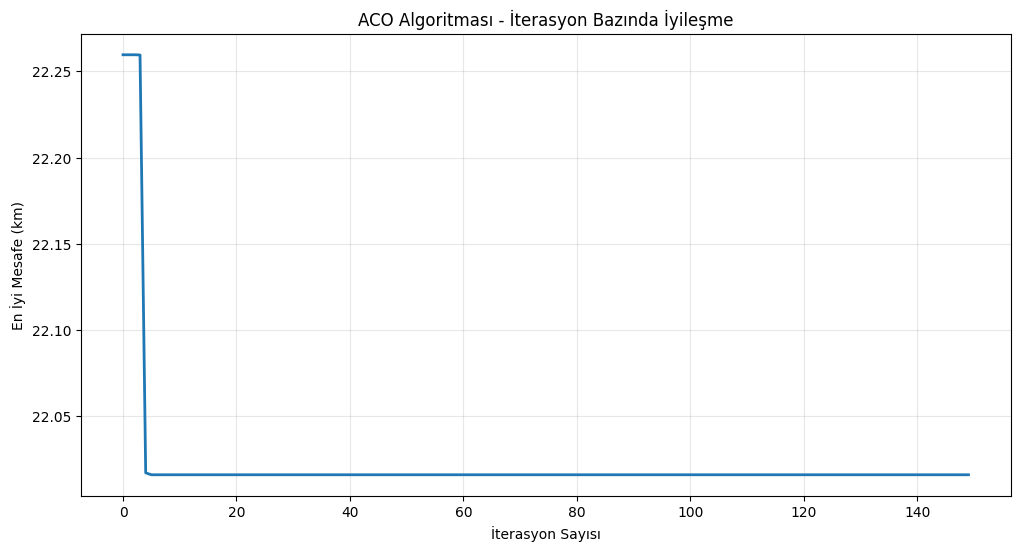


📈 Performans Metrikleri:
Başlangıç Mesafesi: 22.26 km
Final Mesafesi: 22.02 km
İyileşme Oranı: 1.1%


In [7]:
# Algoritma performansı grafiği
plt.figure(figsize=(12, 6))
plt.plot(np.array(history)/1000.0, linewidth=2, color='#1f77b4')
plt.xlabel("İterasyon Sayısı")
plt.ylabel("En İyi Mesafe (km)")
plt.title("ACO Algoritması - İterasyon Bazında İyileşme")
plt.grid(True, alpha=0.3)
plt.show()

# İyileşme oranı
improvement = ((history[0] - history[-1])/history[0]*100)
print(f"\n📈 Performans Metrikleri:")
print(f"Başlangıç Mesafesi: {history[0]/1000:.2f} km")
print(f"Final Mesafesi: {history[-1]/1000:.2f} km")
print(f"İyileşme Oranı: {improvement:.1f}%")

In [8]:
# Harita görselleştirmesi
import folium

# Haritayı ilk noktaya göre ortala
start_lat, start_lng = coords[0]
m = folium.Map(location=[start_lat, start_lng], zoom_start=12)

# Markerları ekle
for idx, (lat, lng) in enumerate(coords):
    if idx == 0:
        # Başlangıç noktası - farklı renk
        folium.Marker(
            [lat, lng], 
            popup=f"🏢 BAŞLANGIÇ: {locations[idx]['name']}", 
            icon=folium.Icon(color='red', icon='home')
        ).add_to(m)
    else:
        folium.Marker(
            [lat, lng], 
            popup=f"📦 {idx}: {locations[idx]['name']}", 
            icon=folium.Icon(color='blue', icon='shopping-cart')
        ).add_to(m)

# Rota çizgisini ekle
path = [coords[i] for i in best_route] + [coords[best_route[0]]]
folium.PolyLine(
    path, 
    weight=4, 
    opacity=0.8, 
    color='red',
    popup=f"Optimum Rota - {best_len_m/1000:.2f} km"
).add_to(m)

# Rota numaralarını ekle
for i, route_idx in enumerate(best_route[1:], 1):
    lat, lng = coords[route_idx]
    folium.CircleMarker(
        [lat, lng],
        radius=15,
        popup=f"Sıra: {i+1}",
        color='white',
        fillColor='red',
        fillOpacity=0.8,
        weight=2
    ).add_to(m)

# Haritayı göster
m